In [1]:
import tensorflow as tf
import keras
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

2023-10-15 14:04:37.958904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os, shutil

In [4]:
# Unzip file
!mkdir -p dogscats/subset
!unzip -o -q dogs-vs-cats.zip -d dogscats 

In [5]:
base_dir = 'dogscats/subset'
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(base_dir, 'train', 'cats')
train_dogs_dir = os.path.join(base_dir, 'train', 'dogs')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [42]:
import os
import zipfile
from keras.preprocessing.image import ImageDataGenerator

# Path to the zip files
train_zip_file = 'dogscats/dogs-vs-cats/train.zip'
validation_zip_file = 'dogscats/dogs-vs-cats/test1.zip'

# Extracted directories
train_extraction_path = 'dogscats/dogs-vs-cats/'
validation_extraction_path = 'dogscats/dogs-vs-cats/'

# Extract zip files
with zipfile.ZipFile(train_zip_file, 'r') as zip_ref:
    zip_ref.extractall(train_extraction_path)

with zipfile.ZipFile(validation_zip_file, 'r') as zip_ref:
    zip_ref.extractall(validation_extraction_path)

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_extraction_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_extraction_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 37500 images belonging to 2 classes.
Found 37500 images belonging to 2 classes.


In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [44]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/var/folders/c8/r5_15f0d253fhwl3qpwdr7rm0000gn/T/ipykernel_82136/3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 128s 1s/step - loss: 0.6304 - acc: 0.6880 - val_loss: 0.6208 - val_acc: 0.6920
Epoch 2/30
100/100 [==============================] - 132s 1s/step - loss: 0.6520 - acc: 0.6540 - val_loss: 0.6506 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 124s 1s/step - loss: 0.6494 - acc: 0.6570 - val_loss: 0.6299 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 122s 1s/step - loss: 0.6421 - acc: 0.6655 - val_loss: 0.6564 - val_acc: 0.6380
Epoch 5/30
100/100 [==============================] - 121s 1s/step - loss: 0.6451 - acc: 0.6635 - val_loss: 0.6389 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 122s 1s/step - loss: 0.6556 - acc: 0.6425 - val_loss: 0.6499 - val_acc: 0.6480
Epoch 7/30
100/100 [==============================] - 123s 1s/step - loss: 0.6453 - acc: 0.6580 - val_loss: 0.6378 - val_acc: 0.6700
Epoch 8/30
100/100 [==============================] - 123s 1s/step - 

In [45]:
model.save('cats_and_dogs_small_1.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


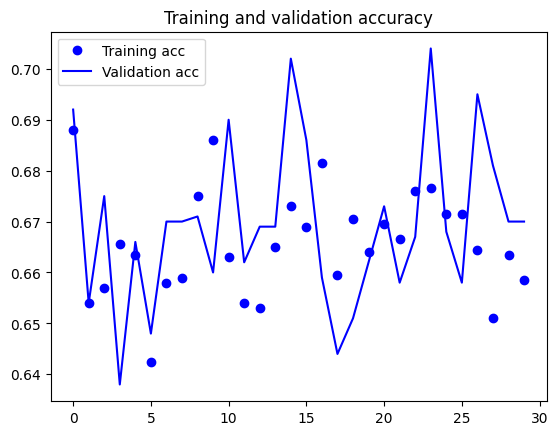

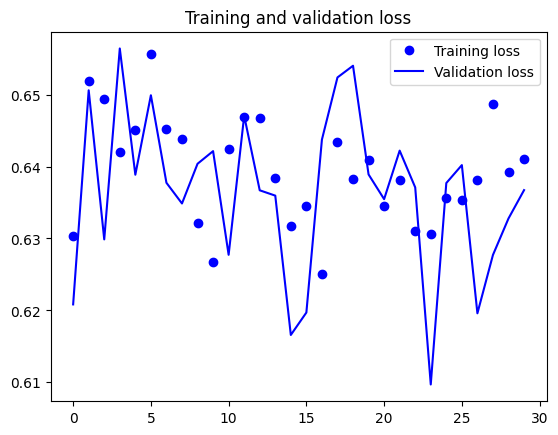

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

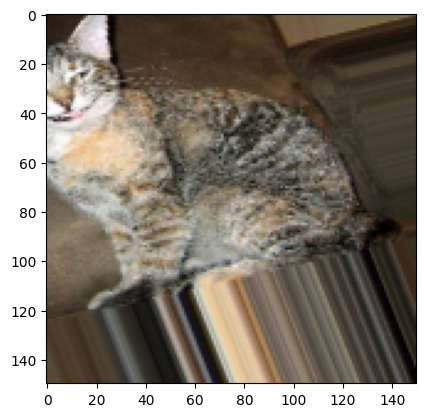

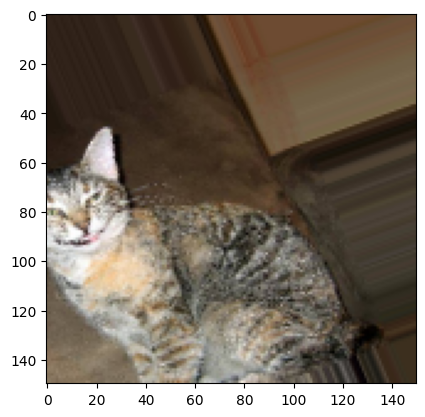

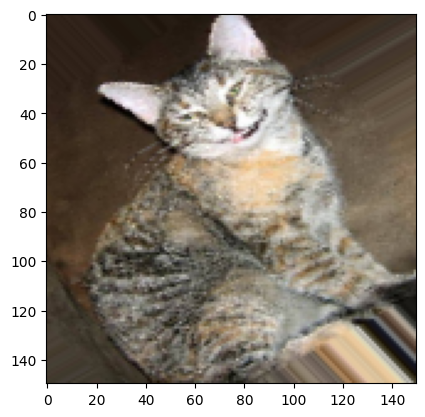

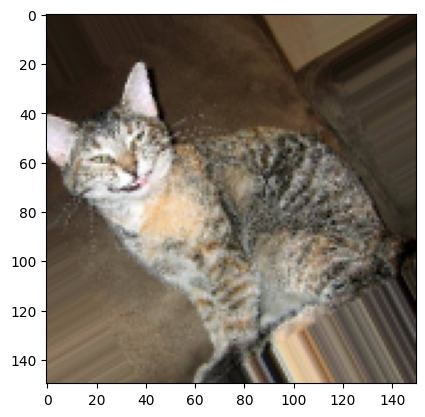

In [50]:
# This is module with image preprocessing utilities
import keras.utils as image

train_cats_dir = 'dogscats/dogs-vs-cats/train'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [54]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size)

Found 37500 images belonging to 2 classes.
Found 37500 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 98s 2s/step - loss: 0.6571 - acc: 0.6447 - val_loss: 0.6445 - val_acc: 0.6613
Epoch 2/100
62/62 [==============================] - 103s 2s/step - loss: 0.6255 - acc: 0.6855 - val_loss: 0.6361 - val_acc: 0.6704
Epoch 3/100
62/62 [==============================] - 97s 2s/step - loss: 0.6501 - acc: 0.6527 - val_loss: 0.6259 - val_acc: 0.6855
Epoch 4/100
62/62 [==============================] - 97s 2s/step - loss: 0.6464 - acc: 0.6562 - val_loss: 0.6370 - val_acc: 0.6653
Epoch 5/100
62/62 [==============================] - 97s 2s/step - loss: 0.6365 - acc: 0.6719 - val_loss: 0.6435 - val_acc: 0.6583
Epoch 6/100
62/62 [==============================] - 97s 2s/step - loss: 0.6470 - acc: 0.6583 - val_loss: 0.6427 - val_acc: 0.6613
Epoch 7/100
62/62 [==============================] - 97s 2s/step - loss: 0.6318 - acc: 0.6794 - val_loss: 0.6403 - val_acc: 0.6

In [55]:
model.save('cats_and_dogs_small_2.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


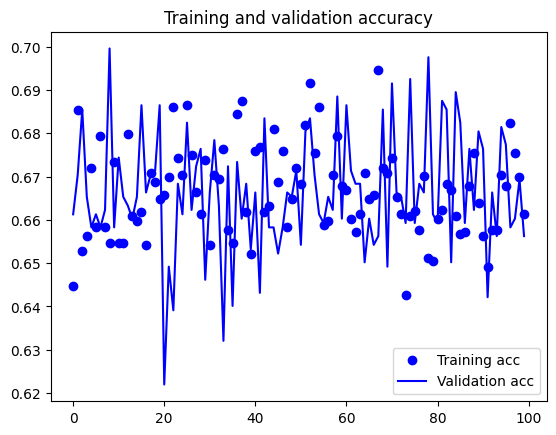

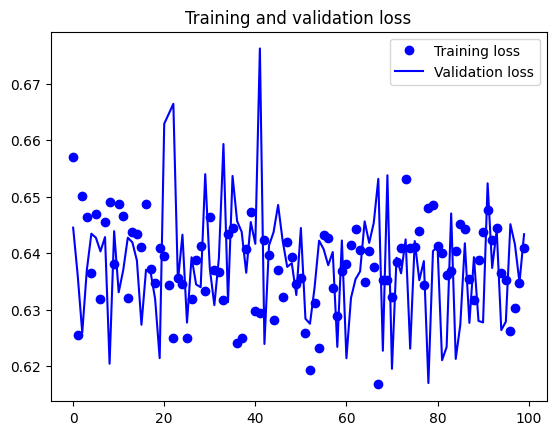

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Baseline (20 points)
You will start with this notebook and run it (you need GPU acceleration) to get baseline results for the train and test datasets after you address overfitting.

Plot the ROC curves
Plot the Recall-Precision curves
Confusion matrix for 50% threshold
Use Optuna to find the best hyperparameters for the baseline model.

Please note that you can use Pytorch for this and subsequent steps of this assignment. You need to recode the model in Pytorch though, however it is typically not very time consuming.

## 1. Plot the ROC curves

1172/1172 [==============================] - 446s 381ms/step


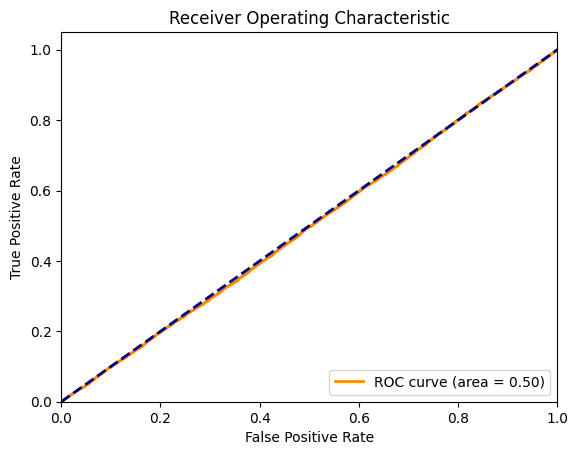

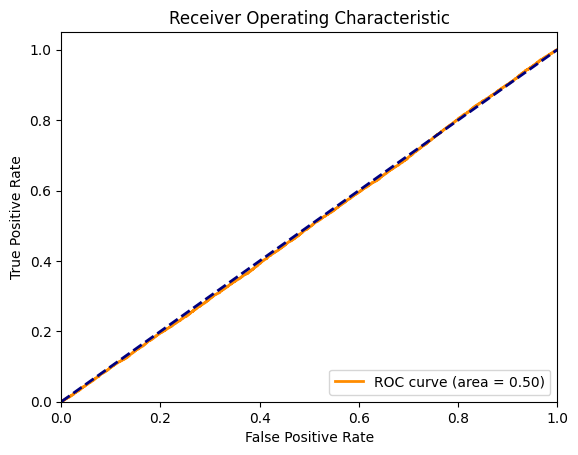

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.preprocessing.image import ImageDataGenerator

# Load the saved model
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for both training and validation sets
train_preds = model.predict(train_generator)
val_preds = model.predict(validation_generator)

# Calculate ROC curve for training set
train_fpr, train_tpr, _ = roc_curve(train_generator.classes, train_preds)
train_roc_auc = auc(train_fpr, train_tpr)

# Calculate ROC curve for validation set
val_fpr, val_tpr, _ = roc_curve(validation_generator.classes, val_preds)
val_roc_auc = auc(val_fpr, val_tpr)

# Plot ROC curves
plot_roc_curve(train_fpr, train_tpr, train_roc_auc, 'Training')
plot_roc_curve(val_fpr, val_tpr, val_roc_auc, 'Validation')


## 2. Plot the Recall-Precision curves

1172/1172 [==============================] - 432s 369ms/step


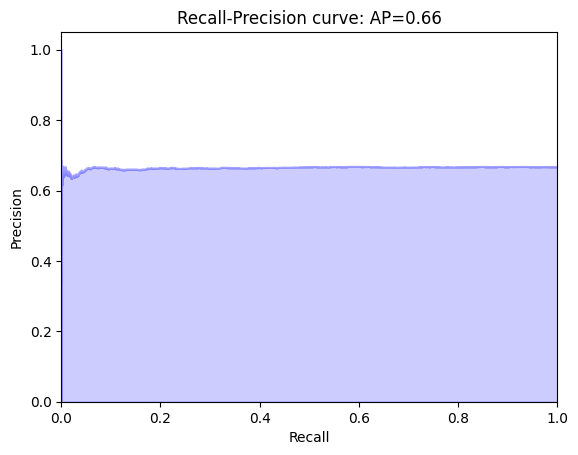

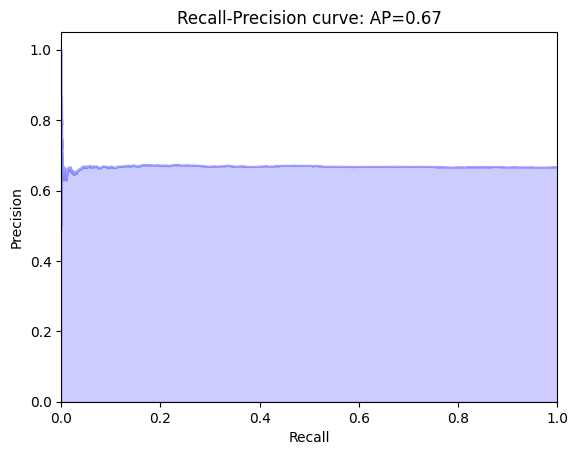

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.preprocessing.image import ImageDataGenerator


# Function to plot Recall-Precision curve
def plot_recall_precision_curve(recall, precision, average_precision, label):
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Recall-Precision curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Predict probabilities for both training and validation sets
train_preds = model.predict(train_generator)
val_preds = model.predict(validation_generator)

# Calculate Recall and Precision for training set
train_precision, train_recall, _ = precision_recall_curve(train_generator.classes, train_preds)
train_average_precision = average_precision_score(train_generator.classes, train_preds)

# Calculate Recall and Precision for validation set
val_precision, val_recall, _ = precision_recall_curve(validation_generator.classes, val_preds)
val_average_precision = average_precision_score(validation_generator.classes, val_preds)

# Plot Recall-Precision curves
plot_recall_precision_curve(train_recall, train_precision, train_average_precision, 'Training')
plot_recall_precision_curve(val_recall, val_precision, val_average_precision, 'Validation')


## 3. Confusion matrix for 50% threshold

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Rest of the code)

# Predict probabilities for the validation set
val_preds = model.predict(validation_generator).ravel()
val_preds_classes = (val_preds > 0.5).astype(int)  # Using 50% threshold

# True classes for the validation set
true_classes = validation_generator.classes

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, val_preds_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Threshold: 50%)')
plt.show()


 11/625 [..............................] - ETA: 1:04:56

KeyboardInterrupt: 

# Cause rare events (5 points)
Produce another dataset with the same number of examples but with the rare class being 10% and 1% of the total. You can do this by sampling from the original dataset and keeping only 10% of the rare class (cats) and 100% of the common class (dogs).

Store such datasets in the data directory.

In [62]:
import os
import shutil
import random

# Original dataset directory
original_dataset_dir = 'dogscats/dogs-vs-cats'

# New dataset directory
new_dataset_dir_10_percent = 'data/new_dataset_10_percent'
new_dataset_dir_1_percent = 'data/new_dataset_1_percent'

# Create directories if they don't exist
os.makedirs(new_dataset_dir_10_percent, exist_ok=True)
os.makedirs(new_dataset_dir_1_percent, exist_ok=True)

# Number of samples for each class
num_dogs_samples = 1250  # Assuming the original dataset has 12500 dog images

# 10% of the rare class (cats)
num_cats_10_percent = 10 * num_dogs_samples // 100

# 1% of the rare class (cats)
num_cats_1_percent = num_cats_10_percent // 10

# Dog images
dog_images = [f for f in os.listdir(os.path.join(original_dataset_dir, 'test1')) if f.endswith('.jpg')]

# Randomly select cat images
cat_images = random.sample([f for f in os.listdir(os.path.join(original_dataset_dir, 'train')) if f.endswith('.jpg')],
                           num_cats_10_percent)

# Copy the selected images to the new dataset directories
for img in dog_images:
    shutil.copy(os.path.join(original_dataset_dir, 'test1', img), new_dataset_dir_10_percent)
    shutil.copy(os.path.join(original_dataset_dir, 'test1', img), new_dataset_dir_1_percent)

for img in cat_images[:num_cats_1_percent]:
    shutil.copy(os.path.join(original_dataset_dir, 'train', img), new_dataset_dir_1_percent)

for img in cat_images:
    shutil.copy(os.path.join(original_dataset_dir, 'train', img), new_dataset_dir_10_percent)
    
print("New datasets with 10% and 1% cats created successfully.")


New datasets with 10% and 1% cats created successfully.


# Re-train and re-evaluate (15 points)
Re-train the model on the rare class datasets and evaluate it by reoplicating the results of the baseline case above. Comment on your observations as to what is the performance of the rare class.

In [28]:
import os
import zipfile
from PIL import Image, UnidentifiedImageError
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from io import BytesIO

train_zip_file = 'dogscats/data/new_dataset_10_percent.zip'
validation_zip_file = 'dogscats/data/new_dataset_1_percent.zip'

# Paths to the new datasets
new_dataset_dir_10_percent = 'dogscats/data/new_dataset_10_percent/'
new_dataset_dir_1_percent = 'dogscats/data/new_dataset_1_percent/'

with zipfile.ZipFile(train_zip_file, 'r') as zip_ref:
    zip_ref.extractall(new_dataset_dir_10_percent)

with zipfile.ZipFile(validation_zip_file, 'r') as zip_ref:
    zip_ref.extractall(new_dataset_dir_1_percent)

def is_valid_image(image):
    try:
        # If the input is a BytesIO object, create an Image instance
        if isinstance(image, BytesIO):
            img = Image.open(image)
            img.close()  # Close the image
            return True
        else:
            # Try to open the image using the file path
            with open(image, 'rb') as img_file:
                img = Image.open(img_file)
                img.close()  # Close the image
            return True
    except (IOError, SyntaxError, Image.DecompressionBombError, UnidentifiedImageError):
        # IOError: Unable to open image file
        # SyntaxError: Image file is not a valid image
        # Image.DecompressionBombError: Image size exceeds limit
        # UnidentifiedImageError: Unable to identify image file
        return False

def train_and_evaluate(model, train_generator, validation_generator, epochs=30):
    try:
        history = model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            validation_data=validation_generator,
            validation_steps=len(validation_generator),
            epochs=epochs
        )
        return history
    except Exception as e:
        print(f"Error occurred during training: {e}")
        return None

# Model architecture and compilation
model = models.Sequential()
# ... (Rest of the model architecture)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator_10_percent = train_datagen.flow_from_directory(
    new_dataset_dir_10_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False  # Set shuffle to False to ensure we process images in order
)

train_generator_1_percent = train_datagen.flow_from_directory(
    new_dataset_dir_1_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False  # Set shuffle to False to ensure we process images in order
)

# Filter out invalid images in 10% dataset
train_generator_10_percent.filenames = [filename for filename in train_generator_10_percent.filenames if is_valid_image(os.path.join(new_dataset_dir_10_percent, filename))]

# Filter out invalid images in 1% dataset
train_generator_1_percent.filenames = [filename for filename in train_generator_1_percent.filenames if is_valid_image(os.path.join(new_dataset_dir_1_percent, filename))]

# Train and evaluate the model on the datasets
history_10_percent = train_and_evaluate(model, train_generator_10_percent, val_datagen.flow_from_directory(
    new_dataset_dir_10_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
))
history_1_percent = train_and_evaluate(model, train_generator_1_percent, val_datagen.flow_from_directory(
    new_dataset_dir_1_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
))

# Evaluate the model on the 10% rare class dataset
val_loss_10_percent, val_acc_10_percent = model.evaluate_generator(val_datagen.flow_from_directory(
    new_dataset_dir_10_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
), len(train_generator_10_percent))
print("Evaluation on 10% rare class dataset:")
print("Validation Loss: {:.4f}".format(val_loss_10_percent))
print("Validation Accuracy: {:.4f}".format(val_acc_10_percent))

# Evaluate the model on the 1% rare class dataset
val_loss_1_percent, val_acc_1_percent = model.evaluate_generator(val_datagen.flow_from_directory(
    new_dataset_dir_1_percent,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
), len(train_generator_1_percent))
print("\nEvaluation on 1% rare class dataset:")
print("Validation Loss: {:.4f}".format(val_loss_1_percent))
print("Validation Accuracy: {:.4f}".format(val_acc_1_percent))


OSError: [Errno 24] Too many open files: 'dogscats/data/new_dataset_10_percent.zip'

# Improve (15 points)

### Representation Learning:
Improve the performance of the model on the rare class by using two of the techniques outlined in section 3 of this paper.

In [18]:
import os
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers

# Extracted directories
train_zip_file = 'dogscats/dogs-vs-cats/train.zip'
validation_zip_file = 'dogscats/dogs-vs-cats/test1.zip'

# Define the directories for your train and validation data
train_dir = 'dogscats/subset/train'
validation_dir = 'dogscats/subset/test1'

# Path to VGG16 weights file
vgg_weights_path = 'dogscats/dogs-vs-cats/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

with zipfile.ZipFile(train_zip_file, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

with zipfile.ZipFile(validation_zip_file, 'r') as zip_ref:
    zip_ref.extractall(validation_dir)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights=None, include_top=False, input_shape=(150, 150, 3))

# Load the weights
base_model.load_weights(vgg_weights_path)

# Add custom top layers for our binary classification problem
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Freeze the pre-trained layers to only train the top layers
base_model.trainable = False

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Use data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalize validation data (no data augmentation for validation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=50
)

# Save the trained model
model.save('vgg16_fine_tuned.h5')


Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.
Epoch 1/3
100/100 [==============================] - 765s 8s/step - loss: 0.0142 - acc: 0.9900 - val_loss: 5.2808e-05 - val_acc: 1.0000
Epoch 2/3
100/100 [==============================] - 746s 7s/step - loss: 2.3694e-05 - acc: 1.0000 - val_loss: 1.0263e-05 - val_acc: 1.0000
Epoch 3/3
100/100 [==============================] - 766s 8s/step - loss: 7.9416e-06 - acc: 1.0000 - val_loss: 5.7184e-06 - val_acc: 1.0000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
